In [205]:
import pandas as pd
import numpy as np

data = pd.read_csv('/home/jovyan/WIDE_HOME/김은선/동별_입지추천_2번.csv')
data.head()#data.drop('Unnamed: 0', axis=1, inplace=True)

,동,교육 서비스업,금융 및 보험업,도매 및 소매업,부동산업,"사업시설 관리, 사업지원 및 임대 서비스업","전문, 과학 및 기술 서비스업",정보통신업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
0,가락동,5.0,1.0,46.0,21.0,8.0,7.0,5.0,11385493,12.740000,0.116528,0.101555,0.062677,4.446749e+06,765395.571429,5.605293e+05,7.307886e+05,2105.000000
1,가산동,4.0,4.0,35.0,40.0,13.0,181.0,302.0,7316824,16.210000,0.532699,0.219801,0.625279,3.261598e+06,170662.250000,7.480468e+05,5.980416e+05,6612.000000
2,가양동,0.0,1.0,13.0,10.0,1.0,2.0,2.0,10897041,12.850000,0.189061,0.114424,0.165897,1.042913e+06,125929.000000,1.606970e+05,1.835663e+05,926.000000
3,갈월동,0.0,0.0,0.0,1.0,0.0,0.0,1.0,12545719,15.674717,0.255648,0.134810,0.143906,2.763232e+06,272339.500000,4.802420e+05,4.870367e+05,2023.306604
4,갈현동,0.0,0.0,15.0,8.0,3.0,4.0,1.0,6066586,12.890000,0.518430,0.206167,0.280109,6.673195e+06,974200.428571,1.049023e+06,1.001296e+06,1594.500000


In [206]:
data.shape

(237, 18)

# 1. 업종: 금융 및 보험업
## 1.1 동 개수 정리 및 정규화

In [207]:
eco = data[['동', '금융 및 보험업', '평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구',
      '청소년생활인구', '청년생활인구', '장년생활인구', '사업체밀도']]

# 금융 및 보험업으로 sort
eco = eco.sort_values('금융 및 보험업', ascending=False)

# 개수가 0인 동 지우기
eco_more_zero = eco[eco['금융 및 보험업'] > 0] #np.mean(dome_sort['금융 및 보험업'])]
eco_more_zero

,동,금융 및 보험업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
132,역삼동,18.0,13441358,12.800000,0.507134,0.149911,0.635192,5.125560e+06,580205.750000,936822.750000,976877.250000,4929.000000
93,서초동,15.0,12221723,12.680000,0.282996,0.157142,0.161723,3.451495e+06,535684.625000,489303.750000,600950.208333,3208.500000
131,여의도동,10.0,11258496,13.928571,0.467980,0.199687,0.241126,5.521853e+06,752742.078175,837679.702381,894686.485714,2596.321429
82,삼성동,6.0,16370755,12.740000,0.139120,0.126996,0.096636,3.310059e+06,460598.857143,524070.285714,613842.095238,1811.666667
130,양재동,4.0,9031457,12.690000,0.234245,0.160168,0.179162,2.823570e+06,349176.300000,403898.400000,521995.266667,643.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
150,용답동,1.0,5615651,12.390000,0.155767,0.089450,0.093606,3.941227e+06,430347.500000,659364.000000,629546.000000,803.000000
26,남대문로5가,1.0,11053446,12.953939,0.166144,0.096902,0.075475,3.435768e+06,457766.575758,505431.989899,593053.986532,1719.909091
38,대림동,1.0,7651808,12.660000,0.282996,0.157142,0.161723,5.114095e+06,496948.200000,660528.900000,891807.166667,2352.333333
113,신대방동,1.0,8910590,12.620000,0.395065,0.153526,0.398457,3.666244e+06,444535.666667,654794.333333,585867.222222,1430.000000


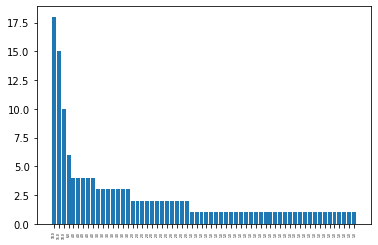

In [208]:
from matplotlib import pyplot as plt

# 개수 plot 그려보기 -> ppt에 쓸 떄는 더 보기 좋게.. 인데 이런식으로 그릴지 고민
plt.bar(eco_more_zero['동'], eco_more_zero['금융 및 보험업'])
#plt.xlabel('개수', fontsize=18)
plt.xticks(eco_more_zero['동'], eco_more_zero['금융 및 보험업'], fontsize=3, rotation=90) # when X tick labels are long
plt.show()

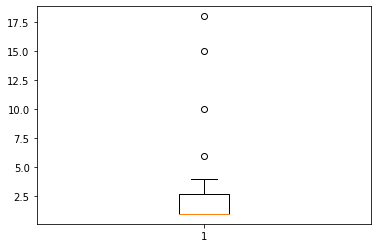

In [209]:
# IQR boxplot 그려보기 -> 분포도 확인
plt.boxplot(eco_more_zero['금융 및 보험업'])
plt.show()

In [210]:
eco_more_zero['금융 및 보험업'].describe()

count    62.000000
mean      2.387097
std       3.020991
min       1.000000
25%       1.000000
50%       1.000000
75%       2.750000
max      18.000000
Name: 금융 및 보험업, dtype: float64

In [211]:
# 금융 및 보험업 개수가 75%이상인 동만 후보군에 올리기

Q3 = eco_more_zero['금융 및 보험업'].describe()['75%']
eco_more_q3 = eco_more_zero[eco_more_zero['금융 및 보험업'] > Q3]
eco_more_q3

,동,금융 및 보험업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
132,역삼동,18.0,13441358,12.800000,0.507134,0.149911,0.635192,5.125560e+06,5.802058e+05,9.368228e+05,976877.250000,4929.000000
93,서초동,15.0,12221723,12.680000,0.282996,0.157142,0.161723,3.451495e+06,5.356846e+05,4.893038e+05,600950.208333,3208.500000
131,여의도동,10.0,11258496,13.928571,0.467980,0.199687,0.241126,5.521853e+06,7.527421e+05,8.376797e+05,894686.485714,2596.321429
82,삼성동,6.0,16370755,12.740000,0.139120,0.126996,0.096636,3.310059e+06,4.605989e+05,5.240703e+05,613842.095238,1811.666667
130,양재동,4.0,9031457,12.690000,0.234245,0.160168,0.179162,2.823570e+06,3.491763e+05,4.038984e+05,521995.266667,643.000000
41,대치동,4.0,19107447,12.760000,0.258026,0.106312,0.115119,5.492734e+06,1.639958e+06,6.553653e+05,846067.111111,2779.333333
1,가산동,4.0,7316824,16.210000,0.532699,0.219801,0.625279,3.261598e+06,1.706622e+05,7.480468e+05,598041.583333,6612.000000
19,구로동,4.0,6517477,12.820000,0.239031,0.132480,0.178131,4.539316e+06,4.185246e+05,6.163570e+05,804883.870370,4354.800000
13,공덕동,4.0,12478538,11.210000,0.375743,0.235856,0.239678,5.082342e+06,6.841800e+05,8.022530e+05,896657.333333,2729.000000
206,충무로3가,3.0,8758759,12.690000,0.140904,0.105377,0.071508,3.305734e+06,4.222338e+05,5.428743e+05,548834.072917,1592.750000


In [212]:
# StandaradScaler로 서로 다른 feature들 단위 조정
from sklearn.preprocessing import StandardScaler

for i in range(1, len(eco_more_q3.columns)):
    #scaler = MinMaxScaler()
    scaler = StandardScaler()
    
    eco_more_q3[eco_more_q3.columns[i]] = scaler.fit_transform(eco_more_q3[eco_more_q3.columns[i]].values.reshape(-1, 1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [213]:
eco_more_q3.reset_index(inplace=True, drop=True)#['도매 및 소매업'] 

## 1.2 pca+kmeans로 클러스터링
- DBSCAN 해보았는데 실루엣 계수가 낮아서 최종은 K-Means로 적용

In [214]:
# 클러스터링 모델로 DBSCAN 해보기
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

eps_numbers = range(1,10,100)
parameter_search = pd.DataFrame(columns = ['eps', 'score'], index = range(1,200))

for i in range(1,200):
    eps = i/10
    model = DBSCAN(eps = eps, min_samples = 2) #min_samples=2
    output = model.fit_predict(pca_values)
    try:
        score = silhouette_score(pca_values, output)
        parameter_search['eps'][i] = eps
        parameter_search['score'][i] = score
        
    except:
        parameter_search['eps'][i] = eps
        parameter_search['score'][i] = 0
        
parameter_search[parameter_search['score'] == parameter_search['score'].max()]

model = DBSCAN(eps = 3.2, min_samples = 2)
output = model.fit_predict(pca_values)

print(output)
score = silhouette_score(pca_values, output)
print(score)

[ 0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0]
0.32829955921327897


- 0.27로 낮은 결과

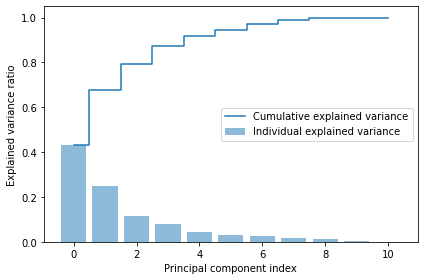

In [215]:
# PCA 적용해서 클러스터링할 때 불필요한 feature 줄여보기
# n_components 수 정하기

#출처: https://vitalflux.com/pca-explained-variance-concept-python-example/

from sklearn.decomposition import PCA

pca = PCA()

# # Determine transformed features # 
X_train_pca = pca.fit_transform(eco_more_q3[eco_more_q3.columns[1:]]) 
# # Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_ 
# # Cumulative sum of eigenvalues; This will be used to create step plot # for visualizing the variance explained by each principal component. 
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# # Create the visualization plot # 
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [216]:
exp_var2 = pd.DataFrame(exp_var_pca)
cum_sum_eigenvalues2 = pd.DataFrame(cum_sum_eigenvalues)

exp_var2.columns = ['exp_var_pca']
cum_sum_eigenvalues2.columns = ['cum_sum_eigenvalues']

explainable = pd.concat([exp_var2, cum_sum_eigenvalues2], axis=1).T
explainable.columns = [i for i in range(1, len(eco_more_q3.columns))]
explainable

,1,2,3,4,5,6,7,8,9,10,11
exp_var_pca,0.431745,0.247363,0.114803,0.077667,0.044553,0.030567,0.024691,0.016159,0.010273,0.001579,0.0006
cum_sum_eigenvalues,0.431745,0.679108,0.793911,0.871578,0.916131,0.946698,0.971389,0.987548,0.997821,0.999400,1.0000


- n_components가 5일 때 데이터를 약 91% 설명할 수 있어서 5로 결정 (내 주관)

In [217]:
pca = PCA(n_components=5)
pca_values = pca.fit_transform(eco_more_q3[eco_more_q3.columns[1:]]) 
pca_values

array([[ 3.65780028,  1.13919178, -2.08319327, -1.61187847,  0.54532603],
       [-0.79776243, -0.17270963, -1.66553898, -1.38817809, -0.56429562],
       [ 2.09555652,  1.23900853, -0.39570241,  0.5765446 , -0.84790278],
       [-2.13765064,  0.43359301, -0.10130879, -0.82300642, -0.48407749],
       [-2.41546083, -1.45736632, -0.52891703,  0.31308307, -0.85229164],
       [-0.20216672,  4.26679062,  1.02545792, -0.07249369,  0.70842799],
       [ 2.50205848, -3.48541692,  0.10522976, -0.2729877 ,  0.19959891],
       [-0.01018455, -0.42032489, -0.63412386,  1.1184094 ,  1.42502512],
       [ 1.55136122,  1.04981232, -0.58583372,  1.88972833, -1.33283378],
       [-2.56337223, -0.74423996, -0.14963518,  0.38007074,  0.65640812],
       [ 3.69089422, -1.50055677,  2.1123185 , -0.05831273,  0.18774101],
       [ 1.59937216, -0.130318  ,  0.04459035,  0.7953336 ,  0.22488131],
       [-1.47796772, -0.14119603, -0.0257731 ,  0.75404398,  0.32177941],
       [-0.38723669,  0.34980057,  2.4

In [218]:
# 클러스터링 모델로 KMeans 적용
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_values)
#kmeans.fit(dome_sort_more_q3[dome_sort_more_q3.columns[1:]])

# 실루엣 계수 확인
from sklearn.metrics.cluster import silhouette_score

cluster = kmeans.predict(pca_values)

score = silhouette_score(pca_values, cluster)
print(score) # 조금 높은 결과

eco_more_q3['label'] = kmeans.labels_

0.33984534323332694


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [219]:
# 클러스터링이 잘되었는지 확인
#(클러스터링을 할때는 5로하고 여기서는 2라서 100% 매치는 안되지만, 적어도 분포를 보여주어서..!)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(eco_more_q3[eco_more_q3.columns[1:]])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(kmeans.labels_)], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2', 'target']

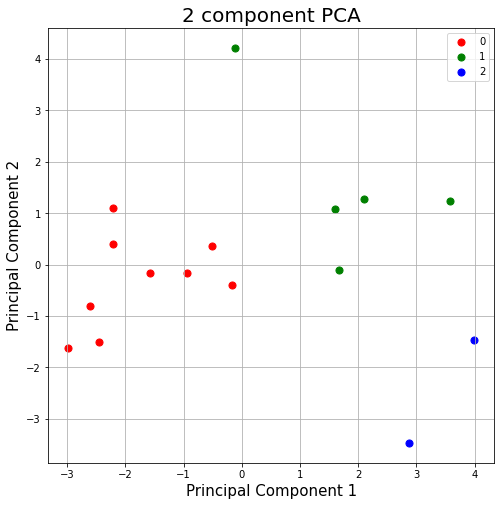

In [220]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

## 1.3 클러스터링 확인 후 '금융 및 보험업'에 제일 적합한 클러스터 선택

In [221]:
# 각 클러스터 보기
eco_more_q3[eco_more_q3['label'] == 0]

,동,금융 및 보험업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label
1,서초동,2.090605,0.108854,-0.496092,-0.243068,0.115206,-0.384019,-0.715441,-0.058271,-1.007293,-0.757269,0.143247,0
3,삼성동,0.083624,1.316649,-0.467786,-1.013951,-0.642837,-0.759918,-0.873984,-0.291091,-0.818166,-0.669330,-0.727639,0
4,양재동,-0.362372,-0.819841,-0.491374,-0.504277,0.191304,-0.283302,-1.419312,-0.636581,-1.471892,-1.295843,-1.456270,0
7,구로동,-0.362372,-1.551668,-0.430043,-0.478634,-0.504932,-0.289256,0.503950,-0.421551,-0.316133,0.633819,0.857933,0
9,충무로3가,-0.585369,-0.899225,-0.491374,-1.004395,-1.186471,-0.905041,-0.878832,-0.410050,-0.715873,-1.112768,-0.864128,0
12,을지로2가,-0.585369,-0.802917,-0.288920,-0.762477,-0.489616,-0.611160,-0.209081,0.057833,-0.493607,-0.313162,-0.741283,0
13,청담동,-0.585369,1.466461,2.551582,-0.153875,-0.398256,-0.419314,-0.040144,-0.103899,-0.104510,0.130880,-0.729925,0
14,방배동,-0.585369,0.800948,-0.491374,-1.004395,-1.186471,-0.905041,-0.004818,0.497439,-0.751981,-0.465931,-0.864128,0
15,이태원동,-0.585369,-0.400025,-0.227180,-0.919184,-1.001833,-0.894496,-1.679592,-1.118781,-1.033645,-1.650540,-0.755176,0


In [222]:
eco_more_q3[eco_more_q3['label'] == 1]

,동,금융 및 보험업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label
0,역삼동,2.759599,0.463893,-0.439479,0.957852,-0.066628,2.350428,1.161100,0.079776,1.427177,1.807033,1.215931,1
2,여의도동,0.975616,-0.171544,0.092954,0.748067,1.185042,0.074561,1.605324,0.614763,0.887846,1.246387,-0.238429,1
5,대치동,-0.362372,2.113308,-0.458350,-0.376858,-1.162974,-0.653174,1.572683,3.365768,-0.103930,0.914741,-0.124326,1
8,공덕동,-0.362372,0.183614,-1.189603,0.253864,2.094557,0.066198,1.112655,0.402171,0.695127,1.259831,-0.155708,1
11,논현동,-0.585369,0.042913,-0.477221,0.636120,0.428410,0.533632,0.353322,-0.546573,1.275094,0.845281,0.653559,1


In [223]:
eco_more_q3[eco_more_q3['label'] == 2]

,동,금융 및 보험업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label
6,가산동,-0.362372,-1.318976,1.169278,1.094827,1.690837,2.293182,-0.928306,-1.190103,0.400249,-0.77711,2.265235,2
10,신문로1가,-0.585369,-0.532443,2.134983,2.770383,0.934662,0.786718,0.440476,-0.240852,2.131536,0.20398,1.521107,2


In [224]:
# 회귀 분석을 통한 각 클러스터의 특징 살펴보기
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

cluster1 = eco_more_q3[eco_more_q3['label'] == 0]
cluster2 = eco_more_q3[eco_more_q3['label'] == 1]
cluster3 = eco_more_q3[eco_more_q3['label'] == 2]

X1 = cluster1[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y1 =  cluster1['금융 및 보험업']
X2 = cluster2[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y2 =  cluster2['금융 및 보험업']
X3 = cluster3[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y3 =  cluster3['금융 및 보험업']

reg1 = LinearRegression().fit(X1,y1)
reg2 = LinearRegression().fit(X2,y2)
reg3 = LinearRegression().fit(X3,y3)

check = pd.DataFrame(columns = ['0번', '1번', '2번'], index = ['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도'])

check['0번'] = reg1.coef_
check['1번'] = reg2.coef_
check['2번'] = reg3.coef_
check = check.transpose()
check

,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
0번,0.538752,-1.395698,3.127236,-1.929525,4.299187,-3.105474,2.218985,2.933418,-0.169328,0.654130
1번,-0.166828,0.465028,0.424970,0.039993,0.943270,0.842178,0.338954,0.137056,0.652402,0.046413
2번,-0.012106,-0.014864,-0.025790,0.011639,0.023187,-0.021068,-0.014611,-0.026647,-0.015101,0.011453


- cluster0: 직업매력도와 교통매력도, 청년생활인구 중시
- cluster1: 직업매력도와 총 생활인구가가 중요시되지만 cluster0의 영향이 더 크다.
- cluster2: 2번과 같이 영향이 적다.


- 직업매력도, 교통매력도, 청년생활인구의 영향이 가장 cluster0선택.

## 1.4 최종 입지 추천 동 고르기
1. 입지 추천을 위한 최종 추천 동은 단순히 업종 개수가 많은 순서로 추천하는 것이 아니라 사업체 창업률, 교통매력도와 같은 다른 변수들도 고려해서 추천한다.
2. 이를 위해 '금융 및 보험업'에 영향을 주는 features의 상관관계 파악하기 위해 회귀 모델을 만들어서 상관계수를 구한다.
3. 구한 coef에 따라 4개의 계층으로 나누어 각 가중치를 1, 0.75, 0.5, 0.25로 주어 최종 score를 정한다.

In [225]:
# 위에서 고른 클러스터에 해당되는 동들을 후보동이라고 저장하기
candidates = eco_more_q3[eco_more_q3['label'] == 0]

In [226]:
# 회귀 분석을 통해 각 '금융 및 보험업'에 영향을 주는 features의 상관관계 파악하기
X = candidates[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y =  candidates['금융 및 보험업']

regression = LinearRegression().fit(X,y)

print( "coefficient=", regression.coef_ )
print( "intercept=", regression.intercept_ )
print( "R²=", regression.score(X, y) )

coefficient= [ 0.53875219 -1.39569838  3.12723622 -1.92952502  4.29918736 -3.10547388
  2.2189847   2.93341806 -0.16932773  0.65412995]
intercept= 4.613362348935188
R²= 1.0


- 데이터 양이 적고 같은 y값이 많아서 R^2이 1.0이 나온 것으로 추정

In [227]:
check = pd.DataFrame(columns = ['Coef'], index = ['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도'])

check['Coef'] = regression.coef_
check = check.transpose()
check

,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
Coef,0.538752,-1.395698,3.127236,-1.929525,4.299187,-3.105474,2.218985,2.933418,-0.169328,0.65413


- 직업매력도가 양의 상관관계로 가장 큰 영향을 주고, 교통매력도, 청년생활인구, 청소년생활인구 순으로 '금융 및 보험업'의 동별 개수에 영향을 끼친다.
- 또한 총생활인구, 주택매력도, 사업체 창업률은 음의 상관관계를 나타낸다.

In [228]:
class1 = ['직업매력도', '금융 및 보험업']
class2 = ['교통매력도', '청년생활인구', '청소년생활인구']
class3 = ['평당금액2', '장년생활인구', '사업체밀도']
class4 = ['총생활인구', '주택매력도', '사업체 창업률']

w1 = 1
w2 = 0.75
w3 = 0.5
w4 = 0.25

w = [w1, w2, w3, w4]

tot = candidates.copy()
tot.index = tot['동']
tot.drop('동', axis=1, inplace=True)

tot['scores'] = 0

for i in tot.columns:
    if i in class1:
        tot['scores'] = tot['scores'] + tot[i]*w[0]
    elif i in class2:
        tot['scores'] = tot['scores'] + tot[i]*w[1]
    elif i in class3:
        tot['scores'] = tot['scores'] + tot[i]*w[2]
    else:
        tot['scores'] = tot['scores'] + tot[i]*w[3]

In [229]:
tot.sort_values('scores', ascending=False)

,금융 및 보험업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label,scores
동,,,,,,,,,,,,,
서초동,2.090605,0.108854,-0.496092,-0.243068,0.115206,-0.384019,-0.715441,-0.058271,-1.007293,-0.757269,0.143247,0,0.248057
청담동,-0.585369,1.466461,2.551582,-0.153875,-0.398256,-0.419314,-0.040144,-0.103899,-0.104510,0.130880,-0.729925,0,-0.392991
구로동,-0.362372,-1.551668,-0.430043,-0.478634,-0.504932,-0.289256,0.503950,-0.421551,-0.316133,0.633819,0.857933,0,-2.126975
삼성동,0.083624,1.316649,-0.467786,-1.013951,-0.642837,-0.759918,-0.873984,-0.291091,-0.818166,-0.669330,-0.727639,0,-3.506264
방배동,-0.585369,0.800948,-0.491374,-1.004395,-1.186471,-0.905041,-0.004818,0.497439,-0.751981,-0.465931,-0.864128,0,-3.899792
을지로2가,-0.585369,-0.802917,-0.288920,-0.762477,-0.489616,-0.611160,-0.209081,0.057833,-0.493607,-0.313162,-0.741283,0,-4.088503
양재동,-0.362372,-0.819841,-0.491374,-0.504277,0.191304,-0.283302,-1.419312,-0.636581,-1.471892,-1.295843,-1.456270,0,-6.026322
충무로3가,-0.585369,-0.899225,-0.491374,-1.004395,-1.186471,-0.905041,-0.878832,-0.410050,-0.715873,-1.112768,-0.864128,0,-6.456723
이태원동,-0.585369,-0.400025,-0.227180,-0.919184,-1.001833,-0.894496,-1.679592,-1.118781,-1.033645,-1.650540,-0.755176,0,-7.391993


In [230]:
tot.sort_values('scores', ascending=False)[['scores']].head(5)

,scores
동,
서초동,0.248057
청담동,-0.392991
구로동,-2.126975
삼성동,-3.506264
방배동,-3.899792


# 2. 업종: 도매 및 소매업
## 2.1 동 개수 정리 및 정규화

In [137]:
dome = data[['동', '도매 및 소매업', '평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구',
      '청소년생활인구', '청년생활인구', '장년생활인구', '사업체밀도']]

# 도매 및 소매업으로 sort
dome_sort = dome.sort_values('도매 및 소매업', ascending=False)

# 0인 동 지우기
dome_sort_more_zero = dome_sort[dome_sort['도매 및 소매업'] > 0]
dome_sort_more_zero

,동,도매 및 소매업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
33,논현동,104.0,11995201,12.720000,0.447087,0.169597,0.320614,4.404940e+06,378204.333333,9.088661e+05,8.358844e+05,4027.000000
132,역삼동,101.0,13441358,12.800000,0.507134,0.149911,0.635192,5.125560e+06,580205.750000,9.368228e+05,9.768772e+05,4929.000000
19,구로동,94.0,6517477,12.820000,0.239031,0.132480,0.178131,4.539316e+06,418524.611111,6.163570e+05,8.048839e+05,4354.800000
93,서초동,93.0,12221723,12.680000,0.282996,0.157142,0.161723,3.451495e+06,535684.625000,4.893038e+05,6.009502e+05,3208.500000
118,신사동,89.0,9206759,12.890000,0.627824,0.246050,0.393501,5.008783e+06,727337.888889,7.728323e+05,8.083030e+05,1905.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
211,충정로3가,1.0,12093816,12.978233,0.299419,0.160977,0.213497,4.169662e+06,525137.096299,6.374572e+05,7.032932e+05,2036.286949
145,옥인동,1.0,9812103,15.891923,0.220708,0.139820,0.139537,4.837936e+06,754994.125175,7.839722e+05,7.639825e+05,2244.230769
105,순화동,1.0,12672864,19.760000,0.259215,0.105250,0.188106,2.131349e+06,259410.000000,3.688550e+05,3.891710e+05,301.000000
109,신공덕동,1.0,13076001,14.220000,0.140309,0.103848,0.082725,6.966305e+06,955546.000000,1.108505e+06,1.196621e+06,3358.000000


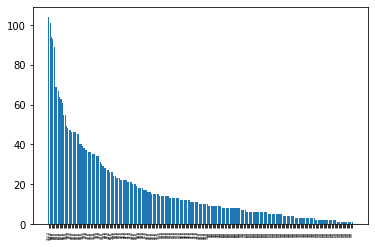

In [138]:
from matplotlib import pyplot as plt

# 개수 plot 그려보기 -> ppt에 쓸 떄는 더 보기 좋게..
plt.bar(dome_sort_more_zero['동'], dome_sort_more_zero['도매 및 소매업'])
#plt.xlabel('Day', fontsize=18)
plt.xticks(dome_sort_more_zero['동'], dome_sort_more_zero['도매 및 소매업'], fontsize=3, rotation=90) # when X tick labels are long
plt.show()

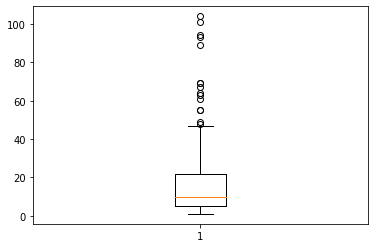

In [139]:
# IQR boxplot 그려보기
plt.boxplot(dome_sort_more_zero['도매 및 소매업'])
plt.show()

In [140]:
dome_sort_more_zero['도매 및 소매업'].describe()

count    225.000000
mean      17.173333
std       19.181259
min        1.000000
25%        5.000000
50%       10.000000
75%       22.000000
max      104.000000
Name: 도매 및 소매업, dtype: float64

In [141]:
# 도매 및 소매업 개수가 75%이상인 동만 후보군에 올리기
Q3 = dome_sort_more_zero['도매 및 소매업'].describe()['75%']
dome_sort_more_q3 = dome_sort[dome_sort['도매 및 소매업'] > Q3]

# StandaradScaler로 서로 다른 feature들 단위 조정
from sklearn.preprocessing import StandardScaler

for i in range(1, len(dome_sort_more_q3.columns)):
    scaler = StandardScaler()
    dome_sort_more_q3[dome_sort_more_q3.columns[i]] = scaler.fit_transform(dome_sort_more_q3[dome_sort_more_q3.columns[i]].values.reshape(-1, 1))

    dome_sort_more_q3.reset_index(inplace=True, drop=True)#['도매 및 소매업'] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## 2.2 t-sne+k-means 클러스터링
- PCA 적용시 DBSCAN과 Kmeans 모두 낮게 나와서 t-sne 적용

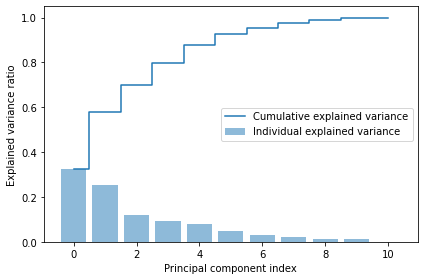

In [142]:
# PCA 적용해서 클러스터링할 때 불필요한 feature 줄여보기

#출처: https://vitalflux.com/pca-explained-variance-concept-python-example/

from sklearn.decomposition import PCA

pca = PCA()

# # Determine transformed features # 
X_train_pca = pca.fit_transform(dome_sort_more_q3[dome_sort_more_q3.columns[1:]]) 
# # Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_ 
# # Cumulative sum of eigenvalues; This will be used to create step plot # for visualizing the variance explained by each principal component. 
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# # Create the visualization plot # 
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [143]:
exp_var2 = pd.DataFrame(exp_var_pca)
cum_sum_eigenvalues2 = pd.DataFrame(cum_sum_eigenvalues)

exp_var2.columns = ['exp_var_pca']
cum_sum_eigenvalues2.columns = ['cum_sum_eigenvalues']

explainable = pd.concat([exp_var2, cum_sum_eigenvalues2], axis=1).T
explainable.columns = [i for i in range(1, len(dome_sort_more_q3.columns))]
explainable

,1,2,3,4,5,6,7,8,9,10,11
exp_var_pca,0.325818,0.253271,0.121679,0.094706,0.080728,0.048660,0.030873,0.019622,0.012670,0.010979,0.000994
cum_sum_eigenvalues,0.325818,0.579089,0.700768,0.795474,0.876202,0.924863,0.955736,0.975358,0.988027,0.999006,1.000000


- n_components가 6일 때 데이터를 약 92% 설명할 수 있어서 6으로 결정 (내 주관)

In [144]:
pca = PCA(n_components=7)
pca_values = pca.fit_transform(dome_sort_more_q3[dome_sort_more_q3.columns[1:]]) 

In [145]:
# 클러스터링 모델로 KMeans 적용
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)#, max_iter=500)
kmeans.fit(pca_values)
#kmeans.fit(dome_sort_more_q3[dome_sort_more_q3.columns[1:]])


# 실루엣 계수 확인
from sklearn.metrics.cluster import silhouette_score

cluster = kmeans.predict(pca_values)

dome_sort_more_q3['label'] = kmeans.labels_
score = silhouette_score(pca_values, cluster)
print(score)

0.22213376130007736


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- kmeans의 실루엣 계수가 낮아서 DBSCAN 사용

In [146]:
# 클러스터링 모델로 DBSCAN 해보기
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

eps_numbers = range(1,10,100)
parameter_search = pd.DataFrame(columns = ['eps', 'score'], index = range(1,200))

for i in range(1,200):
    eps = i/10
    model = DBSCAN(eps = eps, min_samples = 10) #min_samples=2
    output = model.fit_predict(pca_values)
    try:
        score = silhouette_score(pca_values, output)
        parameter_search['eps'][i] = eps
        parameter_search['score'][i] = score
        
    except:
        parameter_search['eps'][i] = eps
        parameter_search['score'][i] = 0

parameter_search[parameter_search['score'] == parameter_search['score'].max()]

,eps,score
44,4.4,0.390517
45,4.5,0.390517
46,4.6,0.390517
47,4.7,0.390517
48,4.8,0.390517
49,4.9,0.390517
50,5,0.390517


In [147]:
model = DBSCAN(eps = 4.8, min_samples = 10)
output = model.fit_predict(pca_values)

In [148]:
dome_sort_more_q3['label'] = output
output # 모두 같은 클러스터에 속한 결과가 좋다고 나온다.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

실루엣 계수가 낮아서 tsne 적용

In [177]:
from sklearn.manifold import TSNE

# 1차원으로 차원 축소
n_components = 1

# t-sne 모델 생성
model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
#print(model.fit_transform(dome_sort_more_q3[dome_sort_more_q3.columns[1:12]]))
digits_tsne = model.fit_transform(dome_sort_more_q3[dome_sort_more_q3.columns[1:12]])

# 클러스터링 모델로 KMeans 적용
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)#, max_iter=500)
kmeans.fit(digits_tsne)
#kmeans.fit(dome_sort_more_q3[dome_sort_more_q3.columns[1:]])

# 실루엣 계수 확인

from sklearn.metrics.cluster import silhouette_score

cluster = kmeans.predict(digits_tsne)

dome_sort_more_q3['label'] = kmeans.labels_
score = silhouette_score(digits_tsne, cluster)
print(score)

0.5218209


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [173]:
eps_numbers = range(1,10,100)

parameter_search = pd.DataFrame(columns = ['eps', 'score'], index = range(1,200))

for i in range(1,200):
    eps = i/10
    model = DBSCAN(eps = eps, min_samples = 5) #min_samples=2
    output = model.fit_predict(digits_tsne)
    try:
        score = silhouette_score(digits_tsne, output)
        parameter_search['eps'][i] = eps
        parameter_search['score'][i] = score
        
    except:
        parameter_search['eps'][i] = eps
        parameter_search['score'][i] = 0

In [174]:
parameter_search[parameter_search['score'] == parameter_search['score'].max()]

,eps,score
1,0.1,0
2,0.2,0
3,0.3,0
4,0.4,0
5,0.5,0
...,...,...
195,19.5,0
196,19.6,0
197,19.7,0
198,19.8,0


## 1.3 최종 입지 추천 동 고르기
(위와 동일)
1. 입지 추천을 위한 최종 추천 동은 단순히 업종 개수가 많은 순서로 추천하는 것이 아니라 사업체 창업률, 교통매력도와 같은 다른 변수들도 고려해서 추천한다.
2. 이를 위해 '도매 및 소매업'에 영향을 주는 features의 상관관계 파악하기 위해 회귀 모델을 만들어서 상관계수를 구한다.
3. 구한 coef에 따라 4개의 계층으로 나누어 각 가중치를 1, 0.75, 0.5, 0.25로 주어 최종 score를 정한다.

In [187]:
dome_sort_more_q3[dome_sort_more_q3['label'] == 0]

,동,도매 및 소매업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label
1,역삼동,2.709687,1.240240,-0.205278,1.356963,0.289993,3.070964,0.461715,-0.233603,1.086069,1.324088,1.277279,0
2,구로동,2.370404,-0.823363,-0.195355,-0.239839,-0.193952,-0.062706,-0.031417,-0.878683,-0.328101,0.398060,0.962598,0
4,신사동,2.128060,-0.021846,-0.160628,2.075781,2.959248,1.413901,0.363485,0.353429,0.362403,0.416469,-0.379842,0
7,마장동,1.061744,0.111264,-2.407965,-0.820736,-0.345039,-0.563538,-1.430317,-1.046005,-0.923401,-1.507923,0.249714,0
10,화곡동,0.770930,-1.052991,-0.195355,0.878932,0.889930,0.174093,1.846126,1.237811,1.455722,1.832773,-0.264435,0
18,독산동,0.043896,-0.702748,-0.225122,-0.298442,-0.218342,-0.235498,-0.915250,-1.185630,-0.646637,-0.718461,-0.354221,0
25,사당동,-0.295386,0.123553,-0.289615,-0.826047,-0.967688,-0.755278,0.214003,0.032132,0.327075,0.124964,-0.709129,0
26,여의도동,-0.343855,0.589656,0.354608,1.123765,1.672001,0.369194,0.795066,0.454788,0.648565,0.881565,-0.001110,0
30,신정동,-0.440793,0.194361,-0.210239,-0.897457,-0.845045,-0.851212,-0.498372,0.780732,-0.918217,-0.727431,-0.592982,0
34,신월동,-0.489262,-1.187164,-0.210239,-1.244641,-0.469872,-0.948369,-0.663023,0.005896,-1.156128,-0.839701,-0.343809,0


In [188]:
dome_sort_more_q3[dome_sort_more_q3['label'] == 1]

,동,도매 및 소매업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label
3,서초동,2.321935,0.876738,-0.264810,0.022016,0.490762,-0.175204,-0.946462,-0.411235,-0.888769,-0.699937,0.334385,1
5,장안동,1.158681,-0.615557,-0.071330,-0.747019,-0.449349,-0.481149,-0.629012,-0.354953,-0.897728,-0.513420,0.314382,1
9,신당동,0.867868,0.456943,0.003085,-0.841981,-2.432329,-0.681060,0.093518,-0.371695,0.063984,0.231811,5.123390,1
11,제기동,0.480117,-0.427623,-1.673736,-0.849063,-0.564381,-0.563538,-1.328770,-1.517932,-0.722310,-1.776271,0.727052,1
13,방배동,0.189303,1.585329,-0.259849,-0.824277,-0.946461,-0.793728,-0.413202,0.303822,-0.681660,-0.469981,-0.551103,1
14,수유동,0.140834,-1.413880,-0.235044,-0.716867,-1.207078,-0.643249,0.549684,0.127368,0.443217,0.155712,-0.207530,1
16,삼성동,0.092365,2.113321,-0.235044,-0.834899,-0.346218,-0.621448,-1.065434,-0.710814,-0.735349,-0.630526,-0.431129,1
17,상계동,0.043896,-0.505197,-0.195355,-1.043817,-0.329119,-0.979124,1.540412,1.791522,0.641627,0.965575,-0.444008,1
19,대치동,0.043896,2.928969,-0.225122,-0.126705,-0.920517,-0.494728,0.770571,3.994627,-0.155962,0.619794,0.099187,1
22,용두동,-0.004573,-0.056674,-0.213649,1.080989,1.199423,1.335819,-0.737283,-0.972425,-0.263206,-0.817354,0.405844,1


In [189]:
dome_sort_more_q3[dome_sort_more_q3['label'] == 2]

,동,도매 및 소매업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label
0,논현동,2.855093,0.809225,-0.244966,0.999325,0.836580,0.914176,-0.144450,-1.039554,0.962701,0.564969,0.782952,2
6,양재동,1.158681,-0.074093,-0.259849,-0.268344,0.574784,-0.055638,-1.474655,-1.155371,-1.265650,-1.125038,-1.071599,2
8,면목동,0.916337,-0.947417,-0.071330,-0.310835,-1.933502,-0.537990,0.816051,0.369793,0.330804,0.802980,-0.480680,2
12,신림동,0.480117,-0.904657,3.798257,2.217420,2.301221,3.318783,0.548652,-0.563194,2.461576,0.402902,0.288076,2
15,창동,0.092365,-0.710010,-0.269771,0.131393,0.194669,0.340247,0.556705,0.537715,0.088045,0.271713,-0.449908,2
20,가락동,0.043896,0.627507,-0.235044,-0.969456,-1.052594,-0.854278,-0.109282,0.505273,-0.574460,-0.000876,-0.270372,2
21,미아동,-0.004573,-0.769600,2.399252,-0.813654,-1.031368,-0.665731,0.771301,0.577136,0.008231,0.386965,-0.398612,2
23,청담동,-0.246917,2.266704,2.940002,0.121163,-0.076167,-0.217103,-0.439712,-0.469946,-0.156432,0.001086,-0.433138,2
27,등촌동,-0.392324,-0.362814,-0.210239,0.789227,0.191996,0.109234,-0.405800,-0.125269,-0.367047,-0.247529,-0.130988,2
28,문정동,-0.392324,0.376111,-0.225122,0.376114,0.726909,0.207510,0.308510,0.374059,0.304088,0.604824,0.097908,2


In [181]:
len(dome_sort_more_q3)

53

In [192]:
# 회귀 분석을 통한 각 클러스터의 특징 살펴보기
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

cluster1 = dome_sort_more_q3[dome_sort_more_q3['label'] == 0]
cluster2 = dome_sort_more_q3[dome_sort_more_q3['label'] == 1]
cluster3 = dome_sort_more_q3[dome_sort_more_q3['label'] == 2]

X1 = cluster1[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y1 =  cluster1['도매 및 소매업']
X2 = cluster2[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y2 =  cluster2['도매 및 소매업']
X3 = cluster3[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y3 =  cluster3['도매 및 소매업']

reg1 = LinearRegression().fit(X1,y1)
reg2 = LinearRegression().fit(X2,y2)
reg3 = LinearRegression().fit(X3,y3)

check = pd.DataFrame(columns = ['0번', '1번', '2번'], index = ['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도'])

check['0번'] = reg1.coef_
check['1번'] = reg2.coef_
check['2번'] = reg3.coef_
check = check.transpose()
check

,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
0번,-0.180904,-0.714559,-0.243266,0.423564,0.109555,-2.827046,0.784376,0.225212,2.298572,0.692906
1번,-0.165442,-0.274233,-0.535851,0.289062,0.346306,-1.375130,0.410064,-0.338456,1.014729,0.358414
2번,-0.423459,-0.098873,-0.194374,-0.488593,0.475298,-2.540269,-0.506583,0.428425,2.723458,-0.884966


- 클러스터 0번은 총생활인구보다는 장년생활인구, 주택매력도와 청소년생활인구가,
- 클러스터 1번은 주택매력도, 직업매력도, 장년생활인구가,
- 클러스터 2번은 직업매력도, 장년생활인구, 청년생활인구가 큰 특징을 보인다.


- 공유 오피스 거점의 특징으로 볼때는 주택매력도보다는 직업매력도의 영향이 크고 장년 및 청년 생활인구가 도소매업에 더 큰 영향을 주므로 클러스터 2번을 선택한다.

In [193]:
# 각 클러스터 보기
candidates = dome_sort_more_q3[dome_sort_more_q3['label'] == 2]

X = candidates[['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도']]
y =  candidates['도매 및 소매업']

regression = LinearRegression().fit(X,y)

print( "coefficient=", regression.coef_ )
print( "intercept=", regression.intercept_ )
print( "R²=", regression.score(X, y) )

coefficient= [-0.42345864 -0.09887323 -0.19437419 -0.48859323  0.47529759 -2.54026884
 -0.5065831   0.42842545  2.72345756 -0.88496558]
intercept= -0.2808438283438005
R²= 0.6633120049672863


In [194]:
check = pd.DataFrame(columns = ['Coef'], index = ['평당금액2', '사업체 창업률', '교통매력도', '주택매력도', '직업매력도', '총생활인구', '청소년생활인구',
       '청년생활인구', '장년생활인구', '사업체밀도'])

check['Coef'] = regression.coef_
check = check.transpose()
check

,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도
Coef,-0.423459,-0.098873,-0.194374,-0.488593,0.475298,-2.540269,-0.506583,0.428425,2.723458,-0.884966


In [195]:
class1 = ['장년생활인구', '도매 및 소매업']
class2 = ['직업매력도', '청년생활인구']
class3 = ['사업체 창업률', '교통매력도']
class4 = ['사업체밀도', '청소년생활인구', '총 생활인구', '평당금액2', '주택매력도']

w1 = 1
w2 = 0.75
w3 = 0.5
w4 = 0.25

w = [w1, w2, w3, w4]

tot = candidates.copy()
tot.index = tot['동']
tot.drop('동', axis=1, inplace=True)

tot['scores'] = 0

for i in tot.columns:
    if i in class1:
        tot['scores'] = tot['scores'] + tot[i]*w[0]
    elif i in class2:
        tot['scores'] = tot['scores'] + tot[i]*w[1]
    elif i in class3:
        tot['scores'] = tot['scores'] + tot[i]*w[2]
    else:
        tot['scores'] = tot['scores'] + tot[i]*w[3]

tot.sort_values('scores', ascending=False)

,도매 및 소매업,평당금액2,사업체 창업률,교통매력도,주택매력도,직업매력도,총생활인구,청소년생활인구,청년생활인구,장년생활인구,사업체밀도,label,scores
동,,,,,,,,,,,,,
신림동,0.480117,-0.904657,3.798257,2.217420,2.301221,3.318783,0.548652,-0.563194,2.461576,0.402902,0.288076,2,11.429562
논현동,2.855093,0.809225,-0.244966,0.999325,0.836580,0.914176,-0.144450,-1.039554,0.962701,0.564969,0.782952,2,7.520110
가산동,-0.489262,-0.585125,1.486426,1.509225,2.230465,3.003006,-1.106199,-1.867612,0.253028,-0.715597,2.199623,2,4.315975
자양동,-0.440793,0.317572,0.097344,0.133557,0.386987,-0.035369,0.743409,0.290804,0.910789,0.852272,-0.513562,2,2.487246
청담동,-0.246917,2.266704,2.940002,0.121163,-0.076167,-0.217103,-0.439712,-0.469946,-0.156432,0.001086,-0.433138,2,2.145669
신길동,-0.440793,0.366910,-0.274732,1.785421,0.997549,0.691395,0.182021,0.097845,-0.113945,0.160564,-0.563845,2,2.097904
문정동,-0.392324,0.376111,-0.225122,0.376114,0.726909,0.207510,0.308510,0.374059,0.304088,0.604824,0.097908,2,2.053210
면목동,0.916337,-0.947417,-0.071330,-0.310835,-1.933502,-0.537990,0.816051,0.369793,0.330804,0.802980,-0.480680,2,1.661133
창동,0.092365,-0.710010,-0.269771,0.131393,0.194669,0.340247,0.556705,0.537715,0.088045,0.271713,-0.449908,2,1.435502


In [199]:
tot.sort_values('scores', ascending=False)[['scores']].head(5)

,scores
동,
신림동,11.429562
논현동,7.520110
가산동,4.315975
자양동,2.487246
청담동,2.145669
